In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN

from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

import warnings

warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [13]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


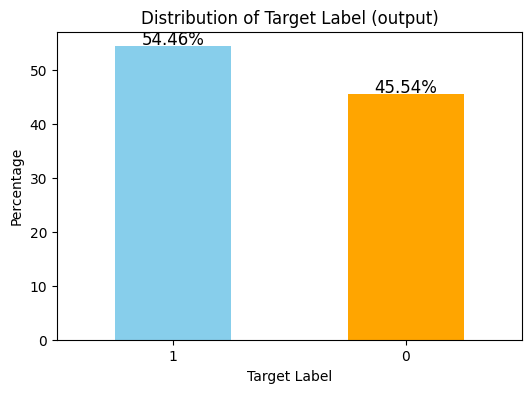

In [15]:
import matplotlib.pyplot as plt

output_counts = df['output'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
ax = output_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Target Label (output)')
plt.xlabel('Target Label')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()


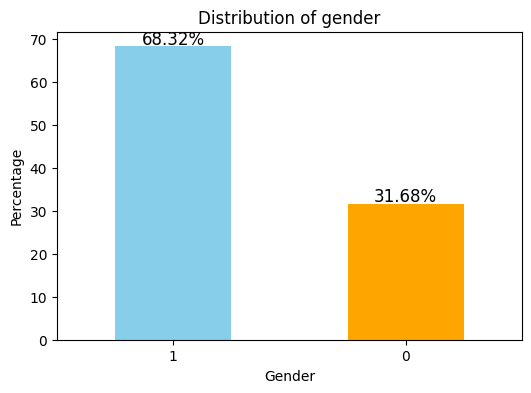

In [16]:
import matplotlib.pyplot as plt

output_counts = df['sex'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
ax = output_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()


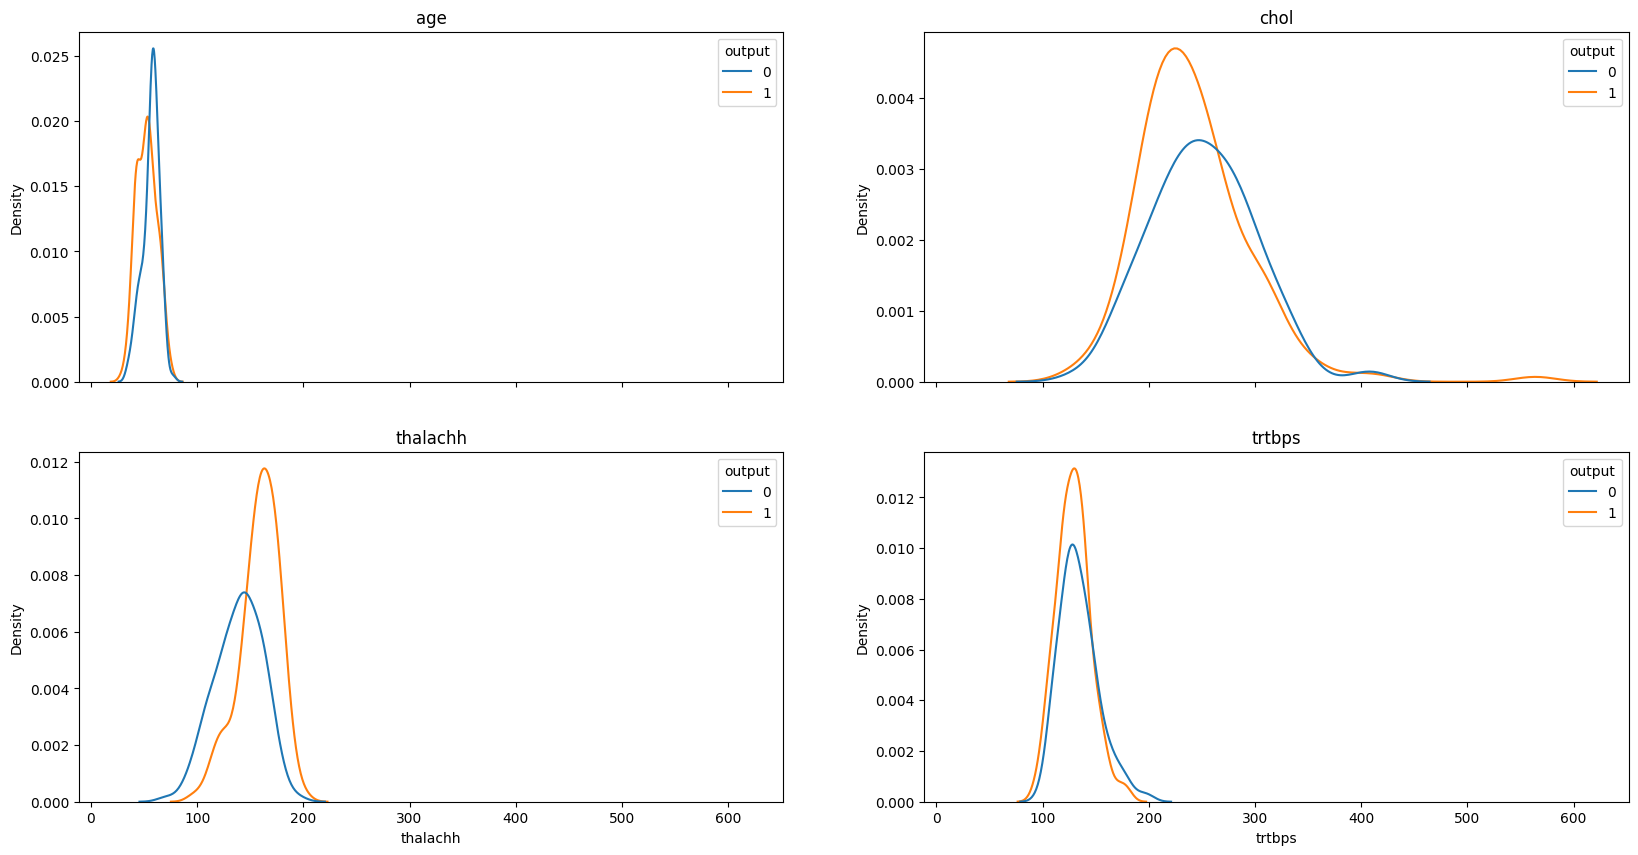

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, sharex=True, figsize=(20, 10))

sns.kdeplot(data=df, x='age', hue='output', ax=axes[0, 0])
axes[0, 0].set_title('age')

sns.kdeplot(data=df, x='chol', hue='output', ax=axes[0, 1])
axes[0, 1].set_title('chol')

sns.kdeplot(data=df, x='thalachh', hue='output', ax=axes[1, 0])
axes[1, 0].set_title('thalachh')

sns.kdeplot(data=df, x='trtbps', hue='output', ax=axes[1, 1])
axes[1, 1].set_title('trtbps')

plt.show()


<Axes: xlabel='caa', ylabel='count'>

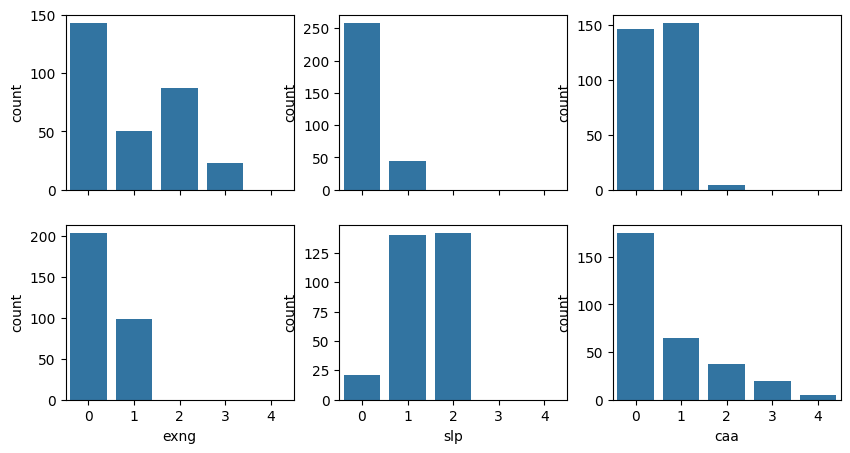

In [18]:
fig, axes = plt.subplots(2,3,sharex=True, figsize=(10,5))

sns.countplot(data = df, x='cp',  ax=axes[0,0])

sns.countplot(data = df, x='fbs', ax=axes[0,1])

sns.countplot(data = df, x='restecg', ax=axes[0,2])

sns.countplot(data = df, x='exng', ax=axes[1,0])

sns.countplot(data = df, x='slp', ax=axes[1,1])

sns.countplot(data = df, x='caa', ax=axes[1,2])

In [19]:
X = df.drop(columns=['output'])
y = df['output']
smoteenn = SMOTEENN()
X_new, y_new = smoteenn.fit_resample(X, y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state= 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(74, 13)
(19, 13)
(74,)
(19,)


In [21]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [22]:
models = {
    'RF' : RandomForestClassifier(),
    'SVM': SVC()
}

result = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    result[name]={
        'Accuracy':accuracy
    }
    
result_df = pd.DataFrame(result) 

result_df

,RF,SVM
Accuracy,0.947368,0.894737
